In [1]:
# Change this accordingly to run this notebook
cd drive/'My Drive'/CMI/sem-4/skillenza_hackathon

/content/drive/My Drive/CMI/sem-4/skillenza_hackathon


In [2]:
ls

 Forecast_VAR_model.ipynb   'Test dataset v1.xlsx'
 skillenza_hackathon.ipynb   Train_data_drivers.ipynb
 skillenza_NN_model.ipynb    Training-Data-Sets.xlsx


In [0]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format # So that values don't get displayed in 1.0000e7 format.
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from xgboost import plot_importance

In [4]:
train = pd.read_excel('Training-Data-Sets.xlsx')
train.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.492980,8.069000,0.067591,7708,42.770000,43.090000,13.663000,5.250000,1.580000,1.679000,446172630,20.580000,2.813500,0.199600,36.223000,54.170000,16.460000,105.710000,36.130000,46.360000,71.830000,5420048,475559,0.376600,45.770000
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.078110,9.328000,0.046174,6693,42.840000,44.260000,9.632000,1.870000,0.806000,1.654000,856199835,26.530000,2.358800,0.293900,43.028000,65.790000,15.640000,111.790000,43.310000,47.580000,67.900000,12155631,371540,0.251500,35.020000
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.948630,9.553000,0.026979,2699,42.950000,48.330000,14.728000,5.640000,3.026000,1.620000,503553502,14.920000,2.839900,0.314830,42.031000,45.080000,23.910000,110.150000,38.260000,49.260000,72.700000,11939870,225984,0.367900,46.220000
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.709160,7.838000,0.106558,4898,43.530000,59.100000,0.465000,2.860000,1.006000,1.620000,463383476,28.920000,2.788900,0.076730,41.377000,75.240000,13.060000,116.740000,39.370000,44.210000,73.010000,7045541,551342,0.050400,38.100000
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.965470,8.085000,0.129135,8678,43.830000,48.500000,9.217000,4.280000,3.681000,1.434000,692252839,36.120000,2.807100,0.363880,38.153000,56.850000,40.720000,115.180000,36.850000,45.460000,75.840000,11488805,254143,0.221900,39.160000


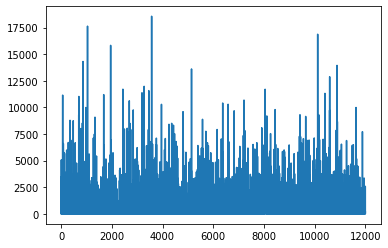

In [5]:
y_train = train['EQ']
plt.plot(y_train)

In [6]:
train.columns

Index(['Day', 'EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

## Finding out drivers of sales (EQ)
This is done using the training data provided of 12k rows.

In [0]:
y_train = np.asarray(train['EQ'])
X_train = np.log(np.asarray(train.drop(['Day','EQ'],axis=1)))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

########### OR ############# # Both log and standard scaler give the same features as important

#y_train = np.log(y_train)                    # This puts y on log scale

<BarContainer object of 37 artists>

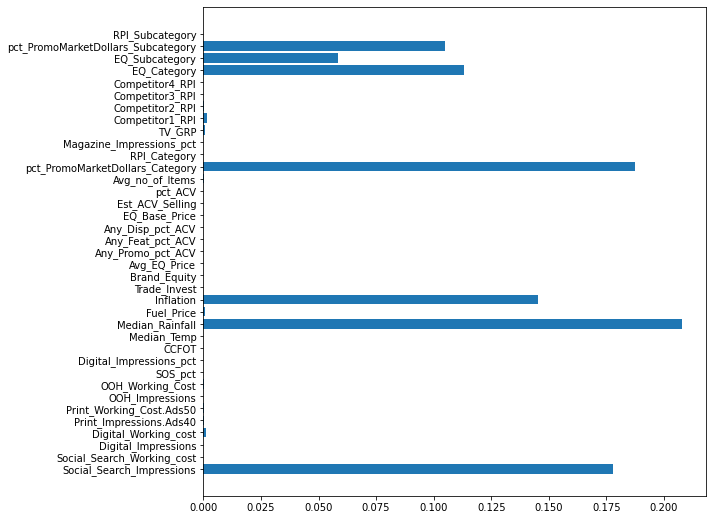

In [21]:
# Fitting a GB Regression model to find out important features
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)

fig = plt.gcf()
fig.set_size_inches(9,9)
plt.barh(train.iloc[:,2:].columns, gb.feature_importances_)
# There are 7 features that contribute the most to prediction

Hence, Following Drivers are most important for predicting sales (EQ) :<br>
- Social_Search_Impressions
- Median_Rainfall
- Inflation
- pct_PromoMarketDollars_Category
- EQ_Category
- EQ_Subcategory
- pct_PromoMarketDollars_Subcategory

## NN model on training data to predict test data sales (EQ)
This NN model trains on 12,000 rows of data and is able to capture the inherent patterns while predicting on the test data sales (EQ)

In [32]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras.layers import Dense

from matplotlib.axes import Axes as ax

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
y_train = np.log(np.asarray(train['EQ']))
X_train = np.log(np.asarray(train.drop(['Day','EQ'],axis=1)))

test = pd.read_excel('Test dataset v1.xlsx')
y_test = np.log(np.asarray(test['EQ']))
X_test = np.log(np.asarray(test.drop(['Period','EQ'],axis=1)))

In [91]:
# NN model

# One hidden layer of size 12. anything more or less --> overfitting
# Activation function tanh is used.
# Weights are initialisd from normal distribution.
# Any more or less Epochs again results in over or under fitting

model = Sequential()
model.add(Dense(12, input_dim=37, kernel_initializer='normal', activation='tanh'))
#model.add(Dense(4, activation='tanh'))
model.add(Dense(1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split = 0.2, verbose = True)

Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 1s 54us/step - loss: 16.9462 - val_loss: 9.9696
Epoch 2/10
9600/9600 [==============================] - 0s 26us/step - loss: 6.6041 - val_loss: 4.5184
Epoch 3/10
9600/9600 [==============================] - 0s 26us/step - loss: 3.7939 - val_loss: 3.3277
Epoch 4/10
9600/9600 [==============================] - 0s 27us/step - loss: 3.3068 - val_loss: 3.1674
Epoch 5/10
9600/9600 [==============================] - 0s 27us/step - loss: 3.2558 - val_loss: 3.1492
Epoch 6/10
9600/9600 [==============================] - 0s 27us/step - loss: 3.2521 - val_loss: 3.1466
Epoch 7/10
9600/9600 [==============================] - 0s 27us/step - loss: 3.2523 - val_loss: 3.1461
Epoch 8/10
9600/9600 [==============================] - 0s 26us/step - loss: 3.2526 - val_loss: 3.1463
Epoch 9/10
9600/9600 [==============================] - 0s 28us/step - loss: 3.2388 - val_loss: 3.0054
Epoch 10/10
9600/9600 [=

In [92]:
model.evaluate(X_test,y_test,batch_size=50,verbose=True)

39/39 [==============================] - 0s 65us/step


1.5630251169204712

In [0]:
# Predict on Test data
pred_y = model.predict(X_test).reshape(39,)
true_EQ = np.exp(y_test)
pred_EQ = np.exp(pred_y)

# Predict on Test data
train_pred_y = model.predict(X_train).reshape(12000,)
train_true_EQ = np.exp(y_train)
train_pred_EQ = np.exp(train_pred_y)

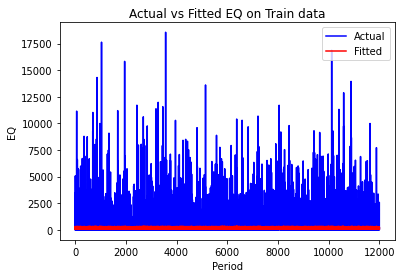

In [100]:
# Plot of Actual vs Fitted values on Train data
plt.plot(train_true_EQ,"-b",label='Actual')
plt.plot(train_pred_EQ,"-r",label='Fitted')
plt.legend(loc="upper right")
plt.title('Actual vs Fitted EQ on Train data')
plt.xlabel('Period')
plt.ylabel('EQ')
plt.show()

In [95]:
train_mape = np.sum(abs((train_true_EQ - train_pred_EQ) / train_true_EQ)) / 12000
print("Train MAPE is",str(round(train_mape,4)))

Train MAPE is 3.0463


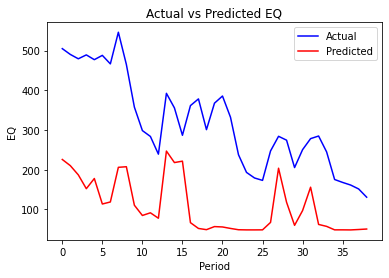

In [98]:
# Plot of Actual vs Precited EQ
plt.plot(true_EQ,"-b",label='Actual')
plt.plot(pred_EQ,"-r",label='Predicted')
plt.legend(loc="upper right")
plt.title('Actual vs Predicted EQ')
plt.xlabel('Period')
plt.ylabel('EQ')
plt.show()

In [97]:
test_mape = np.sum(abs((true_EQ - pred_EQ) / true_EQ)) / 39
print("Test MAPE is ",str(round(test_mape,4)))

Test MAPE is  0.6621


It can be seen that although  the MAPE is larger, NN model captures the patterns and behaviour of the time series pretty well.